<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_3_1_1_SGD_Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

tensor([[-0.7942,  2.1050],
        [-9.1516, -4.8129],
        [-3.1037,  3.9020],
        [-1.4295,  5.1685],
        [-7.4694, -4.2020]], dtype=torch.float64) <class 'torch.Tensor'>
tensor([0, 1, 0, 0, 1]) <class 'torch.Tensor'>


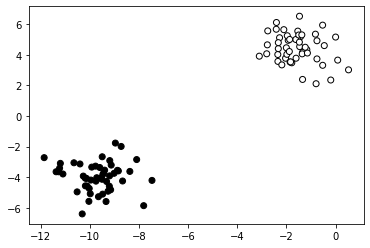

In [ ]:
import sklearn.datasets as skds
X, Y = skds.make_blobs(n_samples=100, n_features=2,
                       centers=2, random_state=1)
X, Y = torch.tensor(X), torch.tensor(Y)
print(X[:5,:],type(X))
print(Y[:5],type(Y))
plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");

In [ ]:
def draw_prob_contours():
  x0, x1 = torch.linspace(-12, 1, 100), torch.linspace(-7, 7, 100)
  grid0, grid1 = torch.meshgrid(x0, x1)
  fig = plt.contour(grid0, grid1, model(w0, w1, b, grid0, grid1), cmap="Greys")
  fig.clabel(inline=True, fontsize=10)
  plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");

z         = lambda w0,w1,b,x0,x1: w0*x0 + w1*x1 + b
y         = lambda z: 1 / (1+torch.exp(-z))
clip_prob = lambda y: torch.max(eps, torch.min(1-eps,y)) 
model     = lambda w0,w1,b,x0,x1: clip_prob(y(z(w0, w1, b, x0, x1)))
eps       = torch.tensor(10**-6)
H         = lambda y,yt: -(yt*torch.log(y) + (1-yt)*torch.log(1-y))
C         = lambda cost_per_point: cost_per_point.mean()
cost_by_w0w1 = lambda w0,w1: C(H(model(w0, w1, b, X[:, 0], X[:, 1]), Y))


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor(0.8867, dtype=torch.float64)


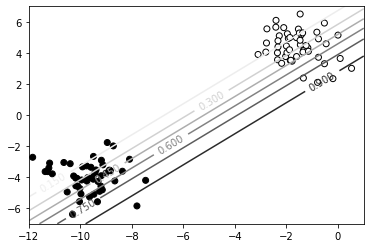

In [ ]:
b=5
w0, w1 = 1, -1
draw_prob_contours()
cost = cost_by_w0w1(w0, w1)
print(cost)

tensor(4.9074, dtype=torch.float64)


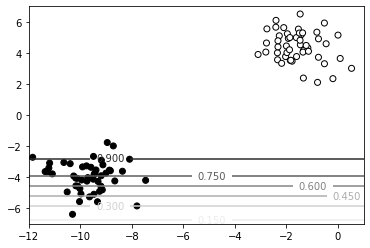

In [ ]:
w0, w1 = 0, 1
draw_prob_contours()
cost = cost_by_w0w1(w0, w1)
print(cost)

tensor(0.0782, dtype=torch.float64)


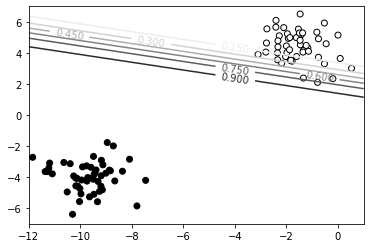

In [ ]:
w0, w1 = -0.5, -2
draw_prob_contours()
cost=cost_by_w0w1(w0, w1)
print(cost)

In [ ]:
b=5
range0, range1 = torch.linspace(-1, 2, 100), torch.linspace(-2,2, 100)
grid0, grid1   = torch.meshgrid(range0, range1)
grid_cost      = torch.zeros(grid0.size())
#this code is slow - vecotrize it.
for index0 in range(len(range0)):
  for index1 in range(len(range1)):
    w0 = grid0[index0,index1]
    w1 = grid1[index0,index1]
    grid_cost[index0,index1] = C(H(model(w0, w1, b, X[:, 0], X[:, 1]), Y))

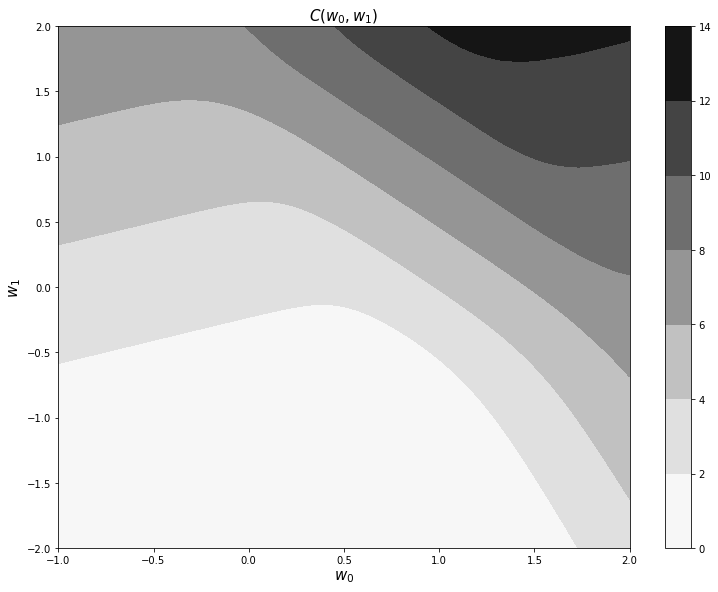

In [ ]:
plt.figure(figsize=[12.8, 9.6])
plt.contourf(grid0, grid1, grid_cost, cmap="Greys");
plt.xlabel("$w_0$", size=15)
plt.ylabel("$w_1$", size=15)
plt.title("$C(w_0,w_1)$", size=15)
plt.colorbar();

In [ ]:
def GD(alpha):
  w = torch.tensor([1.4, 1.4], requires_grad=True)
  iterations   = 10
  history      = torch.zeros(1+iterations, 2)
  history[0,:] = w.detach()
  for idx in range(iterations):
    cost = cost_by_w0w1(w[0], w[1])
    cost.backward()
    with torch.no_grad():
      w -= alpha*w.grad
    w.grad.zero_()
    history[1+idx,:] = w.detach()
  return history

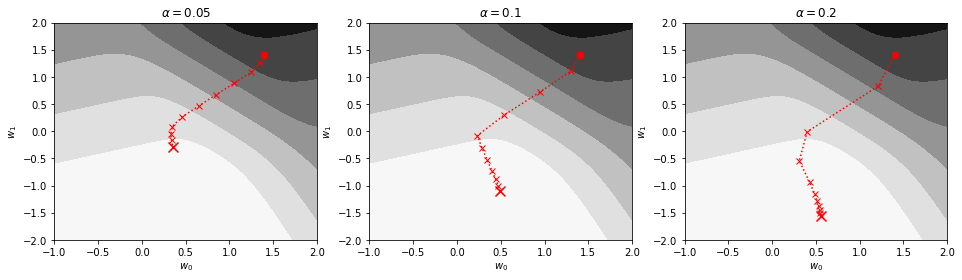

In [ ]:
def draw_descent():
  plt.contourf(grid0, grid1, grid_cost, cmap="Greys");
  plt.scatter(history[0,0], history[0,1], marker="o", color="r")
  plt.scatter(history[-1,0], history[-1,1], marker="x", s=100, color="r")
  plt.plot(history[:,0], history[:,1], linestyle=':', marker="x", color="r")
  plt.xlabel("$w_0$");
  plt.ylabel("$w_1$");

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
history = GD(0.05)
draw_descent()
plt.title(r"$\alpha=0.05$");

plt.subplot(1,3,2)
history = GD(0.1)
draw_descent()
plt.title(r"$\alpha=0.1$");

plt.subplot(1,3,3)
history = GD(0.2)
draw_descent()
plt.title(r"$\alpha=0.2$");


In [ ]:
def SGD(alpha):
  w = torch.tensor([1.4, 1.4], requires_grad=True)
  iterations   = 10
  history      = torch.zeros(1+iterations,2)
  history[0,:] = w.detach()
  batch_idx    = 1
  batch_size   = 2
  for idx in range(iterations):
    X_batch   = X[batch_idx:(batch_idx+batch_size),:]
    Y_batch   = Y[batch_idx:(batch_idx+batch_size)]
    batch_idx = batch_idx+batch_size

    cost=C(H(model(
        w[0], w[1], b, X_batch[:, 0], X_batch[:, 1]), Y_batch))
    cost.backward()
    with torch.no_grad():
      w -= alpha*w.grad
    w.grad.zero_()
    history[1+idx,:] = w.detach()
  return history

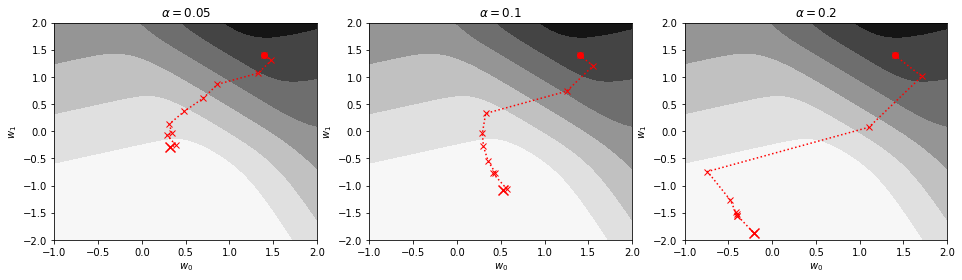

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
history = SGD(0.05)
draw_descent()
plt.title(r"$\alpha=0.05$");

plt.subplot(1,3,2)
history = SGD(0.1)
draw_descent()
plt.title(r"$\alpha=0.1$");

plt.subplot(1,3,3)
history = SGD(0.2)
draw_descent()
plt.title(r"$\alpha=0.2$");


In [ ]:
def eggholder(w0,w1):
  a = -(w1+47) * torch.sin(torch.sqrt(torch.abs(w1 + w0/2 + 47)))
  b = -w0 * torch.sin(torch.sqrt(torch.abs(w0 - (w1 + 47))))
  return a+b

In [ ]:
range0, range1 = torch.linspace(0, 512, 1000), torch.linspace(0, 512, 1000)
grid0, grid1   = torch.meshgrid(range0, range1)
grid_cost      = torch.zeros(grid0.size())
grid_cost      = eggholder(grid0, grid1)

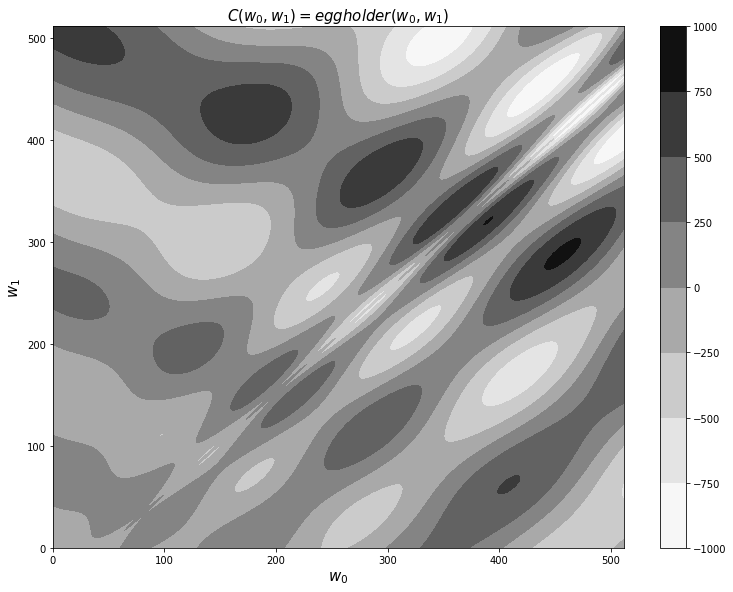

In [ ]:
plt.figure(figsize=[12.8, 9.6])
plt.contourf(grid0, grid1, grid_cost, cmap="Greys");
plt.xlabel("$w_0$", size=15)
plt.ylabel("$w_1$", size=15)
plt.title("$C(w_0,w_1)=eggholder(w_0,w_1)$", size=15)
plt.colorbar();
#global min:
#plt.scatter(512,404.2319,marker="x",s=500, color='r');

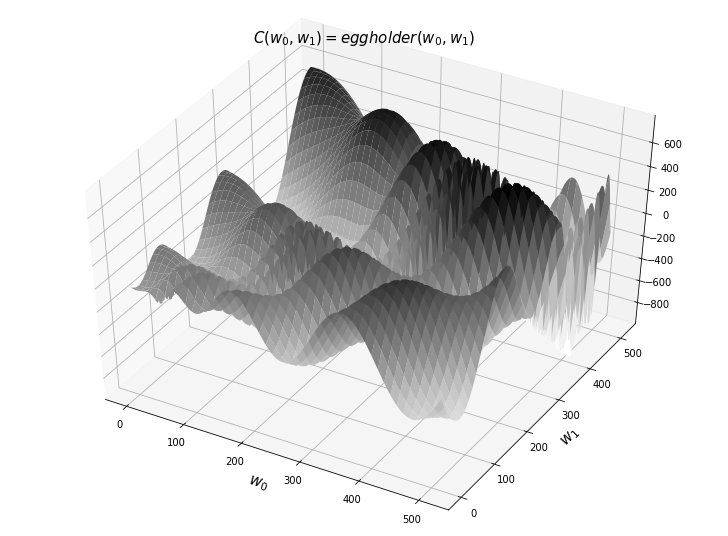

In [ ]:
fig = plt.figure(figsize=[12.8, 9.6])
ax  = fig.add_subplot(111, projection='3d')
ax.view_init(45, -60)
ax.plot_surface(grid0.numpy(), grid1.numpy(), grid_cost.numpy(), cmap='Greys')
ax.set_xlabel("$w_0$", size=15)
ax.set_ylabel("$w_1$", size=15)
ax.set_title("$C(w_0,w_1)=eggholder(w_0,w_1)$", size=15);


In [ ]:
def GD_egg(alpha=1, start=[250., 350.]):
  w            = torch.tensor(start, requires_grad=True)
  iterations   = 10
  history      = torch.zeros(1+iterations,2)
  history[0,:] = w.detach()
  for idx in range(iterations):
    cost = eggholder(w[0], w[1])
    cost.backward()
    with torch.no_grad():
      w -= alpha*w.grad
    w.grad.zero_()
    history[1+idx,:] = w.detach()
  return history

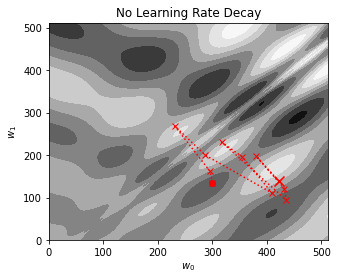

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
history = GD_egg(5, start=[300.,135.])
draw_descent()
plt.title("No Learning Rate Decay");


In [ ]:
history

tensor([[300.0000, 135.0000],
        [296.0009, 161.3980],
        [231.2237, 268.0238],
        [287.2355, 199.5534],
        [409.4453, 110.7234],
        [355.1163, 195.7208],
        [317.1722, 230.4679],
        [435.6841,  94.3321],
        [432.2639, 121.1194],
        [380.6235, 197.0595],
        [422.6456, 137.7906]])

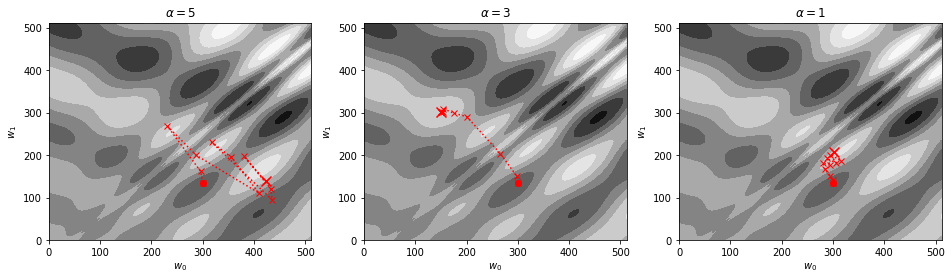

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
history = GD_egg(5, start=[300.,135.])
draw_descent()
plt.title(r"$\alpha=5$");

plt.subplot(1,3,2)
history = GD_egg(3,start=[300.,135.])
draw_descent()
plt.title(r"$\alpha=3$");

plt.subplot(1,3,3)
history = GD_egg(1,start=[300.,135.])
draw_descent()
plt.title(r"$\alpha=1$");

In [ ]:
def SGD_egg(alpha=1, start=[250.,350.]):
  torch.manual_seed(0)
  w            = torch.tensor(start, requires_grad=True)
  iterations   = 150
  history      = torch.zeros(1+iterations,2)
  history[0,:] = w.detach()
  for idx in range(iterations):
    cost = eggholder(w[0], w[1])
    cost.backward()
    with torch.no_grad():
      w -= alpha*(w.grad * torch.normal(1, 15, size=w.size()))
    w.grad.zero_()
    history[1+idx,:] = w.detach()
  return history

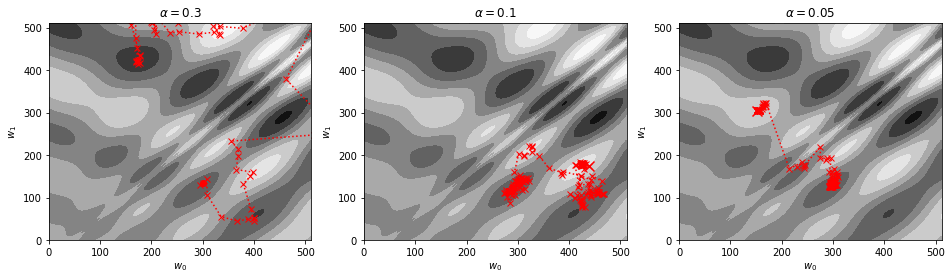

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
history = SGD_egg(0.3, start=[300., 135.])
draw_descent()
plt.xlim((0, 512))
plt.ylim((0, 512))
plt.title(r"$\alpha=0.3$");

plt.subplot(1,3,2)
history=SGD_egg(0.1, start=[300., 135.])
draw_descent()
plt.title(r"$\alpha=0.1$");

plt.subplot(1,3,3)
history=SGD_egg(0.05, start=[300., 135.])
draw_descent()
plt.title(r"$\alpha=0.05$");